In [1]:
import os
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

In [2]:
# Load the trained model
model = cv2.dnn_DetectionModel('fabric_defect_detection_model.pb')

In [3]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 000001A7EE0B5DD0>

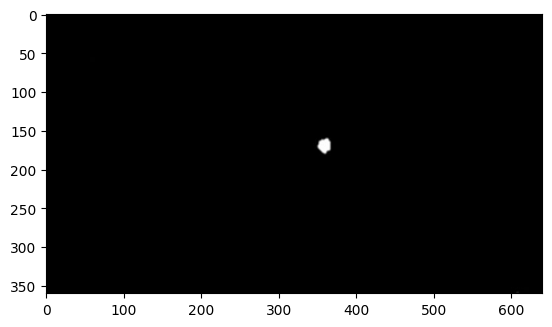

In [4]:
import cv2
import matplotlib.pyplot as plt

# Read the image using OpenCV
img = cv2.imread('hole_train.jpg')

# Display the image
plt.imshow(img)
#plt.axis('off')  # Turn off axis labels
#plt.show()


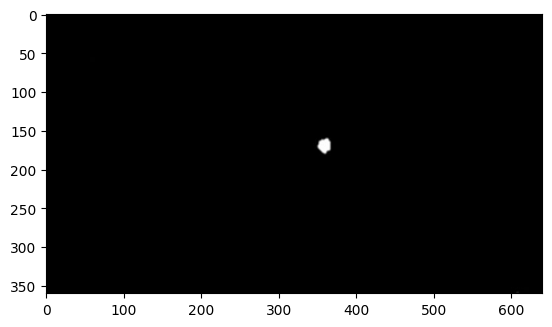

In [5]:
# Display the image using Matplotlib
gray_image=plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB color space for proper display


In [6]:
import cv2
import numpy as np

def detect_defects(image_path):
    # Load the image
    image = cv2.imread(image_path)
    
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply Gaussian blur to smooth the image and remove noise
    blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)
    
    # Apply adaptive thresholding to binarize the image
    _, thresh = cv2.threshold(blurred_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # Find contours in the binary image
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Initialize defect names dictionary
    defect_names = {1: "Hole", 2: "Line", 3: "No Defect"}
    
    # Iterate through the contours and draw bounding boxes around defects
    for contour in contours:
        # Calculate the area of the contour
        area = cv2.contourArea(contour)
        
        # Set a threshold for defect area
        min_defect_area = 100  # Adjust this threshold based on your requirements
        
        if area > min_defect_area:
            # Draw bounding box around the defect
            x, y, w, h = cv2.boundingRect(contour)
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)
            
            # Classify defect based on aspect ratio
            aspect_ratio = float(w) / h
            if aspect_ratio > 2:
                defect_name = defect_names[2]  # Line
            elif aspect_ratio < 1.0:
                defect_name = defect_names[1]  # Hole
            else:
                defect_name = defect_names[3]  # No Defect
                
            # Write defect name on the image
            cv2.putText(image, defect_name, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
    
    # Display the result
    cv2.imshow('Defects Detected', image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Example usage
image_path = 'G:/LBCS/Deep Learning/Deep Learning Assignment/hole_train.jpg'  # Replace with the actual path to your image file
detect_defects(image_path)